In [1]:
import numpy as np

In [2]:
import lmfit as lft

In [3]:
import ligmods

In [4]:
L = ligmods.dilser()

In [5]:
def klotz1(flig,k1):
    "returns bound fraction given free ligand, L, and K (assoc.)"
    return (flig*k1)/(1+(flig*k1))

In [6]:
B = klotz1(L,2)

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

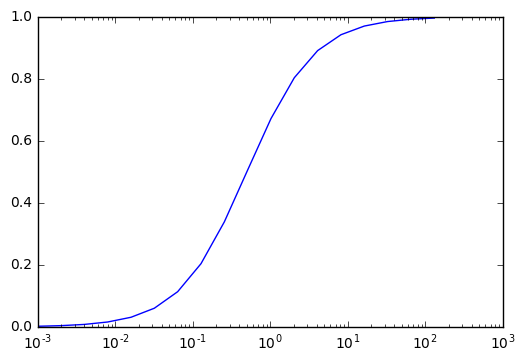

In [9]:
plt.semilogx(L,B)

In [10]:
datset = []
for i in range(5):
    datset.append(ligmods.noiser(B))

In [11]:
datset = np.array(datset)

In [12]:
datset

array([[ 0.00210299,  0.0039267 ,  0.00764795,  0.01548103,  0.03274121,
         0.06005499,  0.10950204,  0.19430923,  0.32584536,  0.478009  ,
         0.66900443,  0.88988025,  0.82438843,  0.90640442,  1.01709131,
         0.93780868,  1.06285922,  0.91850842],
       [ 0.00197368,  0.00443511,  0.00836273,  0.01554318,  0.03012381,
         0.05753577,  0.11054832,  0.18347988,  0.34550276,  0.51238188,
         0.68924559,  0.84477134,  0.86453025,  0.94703656,  1.00167655,
         0.93160376,  0.97467366,  0.99601642],
       [ 0.00196913,  0.00367431,  0.00831487,  0.01427664,  0.03079626,
         0.05760657,  0.11164888,  0.19621059,  0.30598506,  0.48486154,
         0.63500083,  0.8026114 ,  0.88380187,  0.97764762,  0.89569599,
         0.95100712,  0.91107475,  1.04003823],
       [ 0.00184081,  0.00404542,  0.00826435,  0.01590995,  0.03291904,
         0.06303045,  0.12305296,  0.206278  ,  0.33408697,  0.51996781,
         0.66550405,  0.84275289,  0.82078404,  0.995

In [13]:
datset_hi = []
for i in range(4):
    datset_hi.append(ligmods.noiser(B))

In [14]:
datset_hi.append(ligmods.noiser(B,percent=0.2))

In [15]:
datset_hi = np.array(datset_hi)

In [16]:
datset_hi[0:5]

array([[ 0.00201639,  0.00426656,  0.0079448 ,  0.01538291,  0.03040898,
         0.05809548,  0.10990122,  0.19447398,  0.36220856,  0.51826801,
         0.65725737,  0.76332462,  0.9073657 ,  0.97147468,  0.92531217,
         0.96876411,  0.91215359,  0.94264049],
       [ 0.00206167,  0.00431079,  0.00816133,  0.01550953,  0.03212326,
         0.06056698,  0.11644401,  0.20333244,  0.34632163,  0.47293775,
         0.65749464,  0.86219592,  0.95742526,  1.00437124,  0.93148533,
         0.98771075,  0.91784276,  0.99134842],
       [ 0.00209236,  0.00406222,  0.00771882,  0.0170484 ,  0.03196277,
         0.05827464,  0.10932769,  0.19044288,  0.34305052,  0.49785956,
         0.59893697,  0.73932999,  0.86433802,  0.96847677,  1.01583211,
         0.99496299,  1.07453038,  0.98135064],
       [ 0.00196503,  0.00412282,  0.00795766,  0.01613799,  0.03020114,
         0.06245564,  0.11570057,  0.19549761,  0.3383033 ,  0.48411786,
         0.64552566,  0.83652482,  0.87078902,  1.001

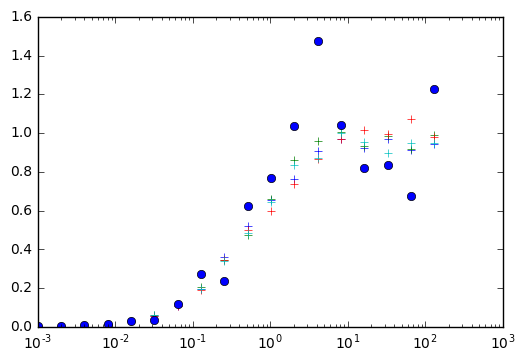

In [17]:
for i in range(4):
    plt.semilogx(L,datset_hi[i],'+')
plt.semilogx(L,datset_hi[4],'bo')

In [18]:
params = lft.Parameters()

In [19]:
params.add('k1',value=47)

In [20]:
params

Parameters([('k1', <Parameter 'k1', 47, bounds=[-inf:inf]>)])

In [21]:
params1 = params

In [22]:
def objfun(params,x,data,eps=None):
    nexp, npts = data.shape #number of experiments and number of data points per exp
    resid = np.zeros(data.shape)
    k1 = params['k1']
    model = klotz1(x,k1)
    
    if eps is None:
        for i in range(nexp):
            resid[i, :] = (data[i, :] - model)
            return resid.flatten()
    else:
        for i in range(nexp):
            weights = 1/(np.square(eps[i, :]))
            resid[i, :] = (data[i, :] - model)*weights
            return resid.flatten()

In [23]:
minner1 = lft.Minimizer(objfun,params1,fcn_args=(L,datset))

In [24]:
result1 = minner1.minimize()

In [25]:
lft.report_fit(result1)

[[Fit Statistics]]
    # function evals   = 18
    # data points      = 90
    # variables        = 1
    chi-square         = 0.029
    reduced chi-square = 0.000
    Akaike info crit   = -720.150
    Bayesian info crit = -717.650
[[Variables]]
    k1:   1.94866363 +/- 0.072322 (3.71%) (init= 47)
[[Correlations]] (unreported correlations are <  0.100)


In [26]:
params1

Parameters([('k1', <Parameter 'k1', 47, bounds=[-inf:inf]>)])

In [27]:
minner2 = lft.Minimizer(objfun,params1,fcn_args=(L,datset_hi))

In [28]:
result2 = minner2.minimize()

In [29]:
lft.report_fit(result2)

[[Fit Statistics]]
    # function evals   = 20
    # data points      = 90
    # variables        = 1
    chi-square         = 0.015
    reduced chi-square = 0.000
    Akaike info crit   = -778.897
    Bayesian info crit = -776.398
[[Variables]]
    k1:   1.97919583 +/- 0.053001 (2.68%) (init= 47)
[[Correlations]] (unreported correlations are <  0.100)


In [30]:
result2_1 = minner2.minimize(method='nelder')

In [31]:
lft.report_fit(result2_1)

[[Fit Statistics]]
    # function evals   = 49
    # data points      = 90
    # variables        = 1
    chi-square         = 0.015
    reduced chi-square = 0.000
    Akaike info crit   = -778.897
    Bayesian info crit = -776.398
[[Variables]]
    k1:   1.97922668 (init= 47)
[[Correlations]] (unreported correlations are <  0.100)


In [32]:
datset

array([[ 0.00210299,  0.0039267 ,  0.00764795,  0.01548103,  0.03274121,
         0.06005499,  0.10950204,  0.19430923,  0.32584536,  0.478009  ,
         0.66900443,  0.88988025,  0.82438843,  0.90640442,  1.01709131,
         0.93780868,  1.06285922,  0.91850842],
       [ 0.00197368,  0.00443511,  0.00836273,  0.01554318,  0.03012381,
         0.05753577,  0.11054832,  0.18347988,  0.34550276,  0.51238188,
         0.68924559,  0.84477134,  0.86453025,  0.94703656,  1.00167655,
         0.93160376,  0.97467366,  0.99601642],
       [ 0.00196913,  0.00367431,  0.00831487,  0.01427664,  0.03079626,
         0.05760657,  0.11164888,  0.19621059,  0.30598506,  0.48486154,
         0.63500083,  0.8026114 ,  0.88380187,  0.97764762,  0.89569599,
         0.95100712,  0.91107475,  1.04003823],
       [ 0.00184081,  0.00404542,  0.00826435,  0.01590995,  0.03291904,
         0.06303045,  0.12305296,  0.206278  ,  0.33408697,  0.51996781,
         0.66550405,  0.84275289,  0.82078404,  0.995

In [33]:
datset.shape

(5, 18)

In [34]:
datset_errs = np.ones(datset.shape)

In [35]:
datset_errs

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.]])

In [36]:
twoz = datset_errs * 2

In [37]:
furs = twoz*2

In [38]:
furs

array([[ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.]])

In [39]:
twoz * furs

array([[ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.]])

In [40]:
np.random.randn(1,0.10)

/Users/michael/miniconda3/envs/fitter/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([], shape=(1, 0), dtype=float64)

In [41]:
testvars = np.random.normal(1,0.1,100)

In [42]:
np.average(testvars)

1.0158981340455193

In [43]:
np.std(testvars)

0.10325471735514548

In [44]:
np.max(testvars)

1.2752622627279631

In [45]:
np.min(testvars)

0.7320947838473344

In [46]:
errs = np.random.normal(1,0.05,datset.shape)

In [47]:
errs

array([[ 0.9296884 ,  0.93933044,  1.01314645,  1.00186913,  0.99188924,
         1.05035437,  0.96421564,  0.91574568,  1.00419767,  0.94170335,
         0.92867778,  1.00102023,  0.91734658,  0.99169074,  1.04728966,
         1.06918946,  0.96272397,  0.95356171],
       [ 1.01706081,  0.95008755,  0.97516189,  1.01981289,  0.97222532,
         1.12593464,  0.9861523 ,  1.07884778,  1.03067809,  1.00597914,
         1.05941136,  0.99943012,  0.98154497,  1.01187441,  0.98724444,
         1.13742606,  1.00425623,  0.9573058 ],
       [ 1.00829164,  0.95078017,  0.97264729,  1.04764195,  1.06848572,
         1.07245034,  0.97244017,  0.95403633,  1.07309045,  0.94835675,
         1.04625669,  1.09824149,  0.93325627,  0.96315791,  1.01618118,
         0.91297169,  1.02840905,  0.96217064],
       [ 0.94161267,  0.92967352,  0.92433939,  0.9637043 ,  1.0387054 ,
         1.08901774,  0.99181852,  0.9250789 ,  0.88390157,  1.01600948,
         0.99393066,  1.06078261,  0.99592091,  1.002

In [48]:
datset_sds = errs*datset

In [49]:
errs = np.random.rand(10)

In [50]:
errs

array([ 0.34108571,  0.54896916,  0.71598106,  0.54937208,  0.69834183,
        0.09164135,  0.89477728,  0.79975266,  0.80449012,  0.89511228])

In [51]:
errs = np.random.normal(1,0.05,20)

In [52]:
errs

array([ 1.09993905,  1.06880694,  1.02557535,  0.97408259,  0.96786647,
        0.97632567,  1.00301843,  1.0413388 ,  1.03224255,  1.03441099,
        0.9975667 ,  0.97101694,  1.04326592,  0.91756161,  0.98965198,
        0.99705637,  1.02991036,  0.94854201,  1.01260677,  0.99543449])

In [53]:
errs*=0.05

In [54]:
errs

array([ 0.05499695,  0.05344035,  0.05127877,  0.04870413,  0.04839332,
        0.04881628,  0.05015092,  0.05206694,  0.05161213,  0.05172055,
        0.04987834,  0.04855085,  0.0521633 ,  0.04587808,  0.0494826 ,
        0.04985282,  0.05149552,  0.0474271 ,  0.05063034,  0.04977172])

In [55]:
errs = np.random.normal(1,0.05,datset.shape)

In [56]:
errs *= 0.05

In [57]:
datset_sds = errs * datset

In [58]:
datset_sds

array([[  1.05776265e-04,   2.06377385e-04,   3.78410615e-04,
          7.45284596e-04,   1.66211657e-03,   2.89080848e-03,
          5.82741215e-03,   9.39487774e-03,   1.61062851e-02,
          2.40971216e-02,   3.43239608e-02,   4.52997146e-02,
          3.76973725e-02,   4.75873157e-02,   4.97884650e-02,
          4.74983568e-02,   4.92545853e-02,   4.79604653e-02],
       [  9.02268235e-05,   2.13149667e-04,   4.44874228e-04,
          8.19181891e-04,   1.47982000e-03,   2.94508468e-03,
          5.80742414e-03,   9.43826345e-03,   1.88321734e-02,
          2.52368535e-02,   3.44609843e-02,   3.73377884e-02,
          4.31298816e-02,   5.10072774e-02,   5.14708711e-02,
          4.68806325e-02,   4.67995057e-02,   5.45054621e-02],
       [  8.88918929e-05,   1.80160816e-04,   3.92705451e-04,
          6.41027441e-04,   1.44791922e-03,   2.83823218e-03,
          5.49632952e-03,   9.56578369e-03,   1.65645212e-02,
          2.51718070e-02,   3.22135693e-02,   4.15291470e-02,
      

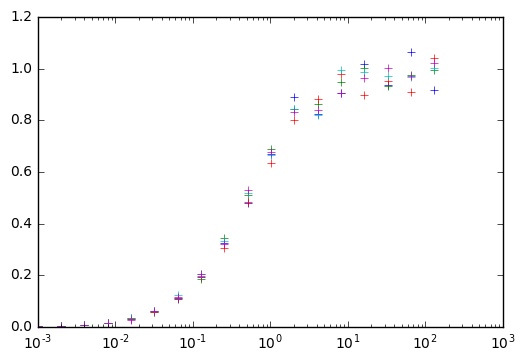

In [59]:
for i in range(5):
    plt.semilogx(L,datset[i],'+')
    

TypeError: errorbar() missing 2 required positional arguments: 'x' and 'y'

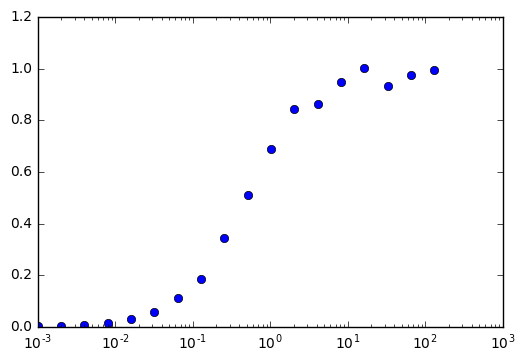

In [61]:
plt.semilogx(L,datset[1],'o')
plt.errorbar()

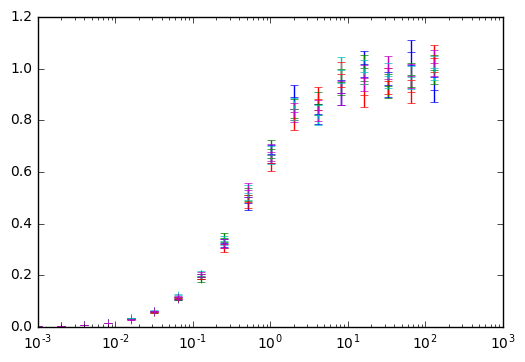

In [62]:
for i in range(5):
    plt.errorbar(L, datset[i], yerr=(datset_sds[i]), marker='+', linestyle='None')
    plt.xscale('log')

In [63]:
params

Parameters([('k1', <Parameter 'k1', 47, bounds=[-inf:inf]>)])

In [65]:
minner1.params

Parameters([('k1', <Parameter 'k1', 47, bounds=[-inf:inf]>)])

In [66]:
result1.params

Parameters([('k1',
             <Parameter 'k1', value=1.9486636307785898 +/- 0.0723, bounds=[-inf:inf]>)])

In [67]:
minner_wts = lft.Minimizer(objfun, params, fcn_args=(L,datset,datset_sds))

In [68]:
result_wts = minner_wts.minimize()

In [69]:
lft.report_fit(result_wts)

[[Fit Statistics]]
    # function evals   = 11
    # data points      = 90
    # variables        = 1
    chi-square         = 49982755.262
    reduced chi-square = 561603.992
    Akaike info crit   = 1192.464
    Bayesian info crit = 1194.964
[[Variables]]
    k1:   2.06579109 +/- 0.007117 (0.34%) (init= 47)
[[Correlations]] (unreported correlations are <  0.100)


In [70]:
result_wts.params

Parameters([('k1',
             <Parameter 'k1', value=2.0657910903628069 +/- 0.00712, bounds=[-inf:inf]>)])

In [71]:
result_wts.params.add('noise', value=0.01, min=0.0001, max=0.1)

In [72]:
def lnprob(params,x,data,eps=None):
    noise = params['noise']
    return -0.5 * np.sum((objfun(params,x,data,eps) / noise)**2 + np.log(2 * np.pi * noise**2))

In [73]:
mcmc_wts = lft.Minimizer(lnprob, result_wts.params, fcn_args=(L,datset))

In [74]:
result_mcmc_wts = mcmc_wts.emcee(burn=500, steps=1000, thin=30, is_weighted=False)

In [75]:
import corner

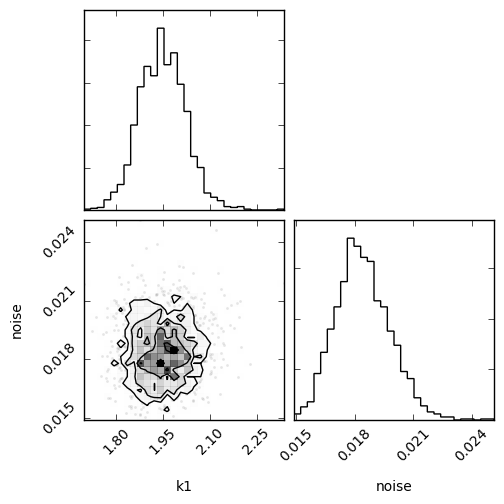

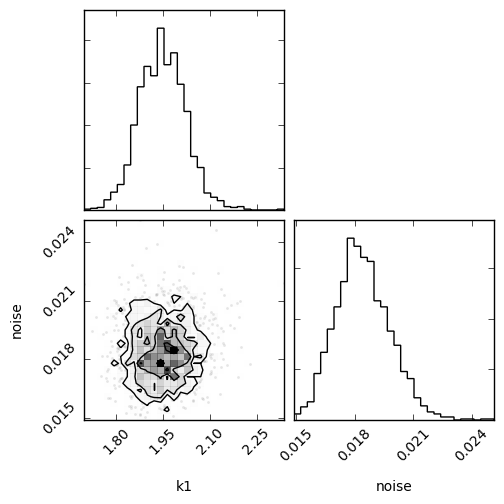

In [76]:
corner.corner(result_mcmc_wts.flatchain, bins=30)

In [77]:
datset

array([[ 0.00210299,  0.0039267 ,  0.00764795,  0.01548103,  0.03274121,
         0.06005499,  0.10950204,  0.19430923,  0.32584536,  0.478009  ,
         0.66900443,  0.88988025,  0.82438843,  0.90640442,  1.01709131,
         0.93780868,  1.06285922,  0.91850842],
       [ 0.00197368,  0.00443511,  0.00836273,  0.01554318,  0.03012381,
         0.05753577,  0.11054832,  0.18347988,  0.34550276,  0.51238188,
         0.68924559,  0.84477134,  0.86453025,  0.94703656,  1.00167655,
         0.93160376,  0.97467366,  0.99601642],
       [ 0.00196913,  0.00367431,  0.00831487,  0.01427664,  0.03079626,
         0.05760657,  0.11164888,  0.19621059,  0.30598506,  0.48486154,
         0.63500083,  0.8026114 ,  0.88380187,  0.97764762,  0.89569599,
         0.95100712,  0.91107475,  1.04003823],
       [ 0.00184081,  0.00404542,  0.00826435,  0.01590995,  0.03291904,
         0.06303045,  0.12305296,  0.206278  ,  0.33408697,  0.51996781,
         0.66550405,  0.84275289,  0.82078404,  0.995

In [78]:
datset[1]

array([ 0.00197368,  0.00443511,  0.00836273,  0.01554318,  0.03012381,
        0.05753577,  0.11054832,  0.18347988,  0.34550276,  0.51238188,
        0.68924559,  0.84477134,  0.86453025,  0.94703656,  1.00167655,
        0.93160376,  0.97467366,  0.99601642])

In [79]:
datset.shape

(5, 18)